<br>


## Assessment task 3
##### Data Product with Machine Learning

<hr>

### Nathan Collins  -  12062131

<br>
<br>
<br>



![image.png](https://i.ibb.co/k2XxH7H/Fat-person-on-plane-jpg-3-620x350.jpg
)


<br>
<br>
<br>

## The Brief:
You have been tasked to build a data product that will help users in the USA to better estimate their local travel airfare. 

Users will be able to provide details of their trip and the app will predict the expected flight fare.

<br>

<hr>

<br>

You will have to build a Streamlit app that let users provide the following inputs:

 - Origin airport
 - Destination airport
 - Departure date
 - Departure time
 - Cabin type (coach, premium, …)

 <br>

Your group will need to train 4 different models, one per student. Each student will need to submit their best model and make it available in the Streamlit app.

Users can validate their inputs by clicking on a button. The Streamlit application will then call the models trained by each student and return the predicted fares.

<br>
<hr>

## Deliverables:

Zip file containing project code, model artifacts, instructions or any relevant documents

Streamlit app users can interact with and get the results of the predictions

Final report describing the machine learning models and their hyperparameters or neural networks architecture, performance achieved, deployment. 

The report should not exceed 4000 words. You can find the report template: hereLinks to an external site.

<br>
<hr>

## Submission:

All assignments need to be submitted before the due date on Canvas. Penalties will be applied for late submission. 

Only one submission per group is required.



<br>
<br>
<br>
<br>


<br>
<br>
<br>
<br>

![image.png](https://i.ibb.co/wh2MfJR/5566691.png
) 

## Importing Libraries 

<hr>

In [1]:
%run /Users/nate/Desktop/MDSI/Sem_2/AMLA/assignment_3/src/libraries.ipynb

<br>
<br>
<br>
<br>

## Forming the Dataframe
<hr>

In [2]:
# # Function to extract and read CSV files from nested zipped folders
# def extract_and_read_csv_from_directory(directory, dataframes):
#     for root, dirs, files in os.walk(directory):
#         for dir_name in dirs:
#             subfolder_path = os.path.join(root, dir_name)
#             zipped_folders = [f for f in os.listdir(subfolder_path) if f.endswith('.zip')]

#             for zipped_folder in zipped_folders:
#                 zip_file_path = os.path.join(subfolder_path, zipped_folder)

#                 # Extract the zip file
#                 with zipfile.ZipFile(zip_file_path, 'r') as zip_ref:
#                     zip_ref.extractall(subfolder_path)

#                 # Identify the extracted CSV files
#                 extracted_csv_files = [f for f in os.listdir(subfolder_path) if f.endswith('.csv')]

#                 for csv_file in extracted_csv_files:
#                     csv_file_path = os.path.join(subfolder_path, csv_file)
#                     df = pd.read_csv(csv_file_path)
#                     dataframes.append(df)
#                     os.remove(csv_file_path)

# # Create a list to store the DataFrames
# dataframes = []

# # Specify the root directory containing the top-level folder
# root_directory = '/Users/nate/Desktop/MDSI/Sem_2/AMLA/assignment_3/data/itineraries_csv'

# # Call the function to extract and read CSV files
# extract_and_read_csv_from_directory(root_directory, dataframes)

# # Concatenate the DataFrames into a single DataFrame
# concatenated_df = pd.concat(dataframes, ignore_index=True)

# concatenated_df.shape

<br>
<br>
<br>
<br>

## Saving the Dataframe
<hr>

In [3]:
# # Save the concatenated DataFrame as a pickle file to /Users/nate/Desktop/MDSI/Sem_2/AMLA/assignment_3/data/processed_data
# concatenated_df.to_pickle('/Users/nate/Desktop/MDSI/Sem_2/AMLA/assignment_3/data/processed_data/concatenated_df.pkl')

<br>
<br>
<br>
<br>

## Retrieving the Dataframe
<hr>

In [4]:
# Read the concatenated DataFrame from the pickle file
df = pd.read_pickle('/Users/nate/Desktop/MDSI/Sem_2/AMLA/assignment_3/data/processed_data/concatenated_df.pkl')

<br>
<br>
<br>
<br>
<br>
<br>
<br>
<br>

![image.png](https://i.ibb.co/wh2MfJR/5566691.png
) 

## Understanding & Cleaning the Dataframe"
<hr>

In [5]:
# Displaying head of the dataset
df.head()

legId  searchDate  flightDate startingAirport  \
0  e1b137527b9175d7d930c3af82e70ae0  2022-04-19  2022-05-20             OAK   
1  d813ebd107e3fa700206c0d96015da7a  2022-04-19  2022-05-20             OAK   
2  e8ece5ad6f5962c696e06e031fc2a24a  2022-04-19  2022-05-20             OAK   
3  c004a54681335100f326c9613b3c9448  2022-04-19  2022-05-20             OAK   
4  4a42bbf77211b4afa7b9e14005949120  2022-04-19  2022-05-20             OAK   

  destinationAirport travelDuration  isBasicEconomy  isRefundable  isNonStop  \
0                ATL        PT7H52M           False         False      False   
1                ATL        PT6H15M           False         False      False   
2                ATL         PT9H6M           False         False      False   
3                ATL        PT6H17M           False         False      False   
4                ATL       PT14H12M           False         False      False   

   totalFare  ...  segmentsArrivalTimeEpochSeconds  \
0     103.98  ...           1653107460||1653126600   
1     216.58  ...           1653067080||1653084660   
2     216.58  ...           1653056820||1653084660   
3     237.58  ...           1653110940||1653127980   
4     307.21  ...           1653115560||1653159180   

                              segmentsArrivalTimeRaw  \
0  2022-05-20T22:31:00.000-06:00||2022-05-21T05:5...   
1  2022-05-20T10:18:00.000-07:00||2022-05-20T18:1...   
2  2022-05-20T07:27:00.000-07:00||2022-05-20T18:1...   
3  2022-05-20T22:29:00.000-07:00||2022-05-21T06:1...   
4  2022-05-20T23:46:00.000-07:00||2022-05-21T14:5...   

  segmentsArrivalAirportCode segmentsDepartureAirportCode  \
0                   DEN||ATL                     OAK||DEN   
1                   LAX||ATL                     OAK||LAX   
2                   LAX||ATL                     OAK||LAX   
3                   LAS||ATL                     OAK||LAS   
4                   SEA||ATL                     OAK||SEA   

                    segmentsAirlineName segmentsAirlineCode  \
0  Frontier Airlines||Frontier Airlines              F9||F9   
1      Spirit Airlines||Spirit Airlines              NK||NK   
2      Spirit Airlines||Spirit Airlines              NK||NK   
3      Spirit Airlines||Spirit Airlines              NK||NK   
4      Alaska Airlines||Alaska Airlines              AS||AS   

                        segmentsEquipmentDescription  \
0                                      ||Airbus A320   
1                  ||AIRBUS INDUSTRIE A320 SHARKLETS   
2  AIRBUS INDUSTRIE A320 SHARKLETS||AIRBUS INDUST...   
3       AIRBUS INDUSTRIE A320 SHARKLETS||Airbus A319   
4                     Boeing 737-900||Boeing 737-900   

  segmentsDurationInSeconds segmentsDistance segmentsCabinCode  
0               9180||10620        943||1207      coach||coach  
1               4920||15600       None||None      coach||coach  
2               4920||15600       None||None      coach||coach  
3               5580||13980       None||None      coach||coach  
4               7500||17580        672||2178      coach||coach  

[5 rows x 23 columns]

## Descriptive Statistics of the Total Fare Variable

In [6]:

# Set the display options (So it does not display cientific notation)
pd.set_option('display.float_format', lambda x: '%.3f' % x)

# Describing "TotalFare" the outcome variable
df['totalFare'].describe()


count   13521345.000
mean         373.751
std          207.549
min           23.970
25%          223.470
50%          344.600
75%          487.600
max         8260.610
Name: totalFare, dtype: float64

## Distribution Analysis of Total Fare

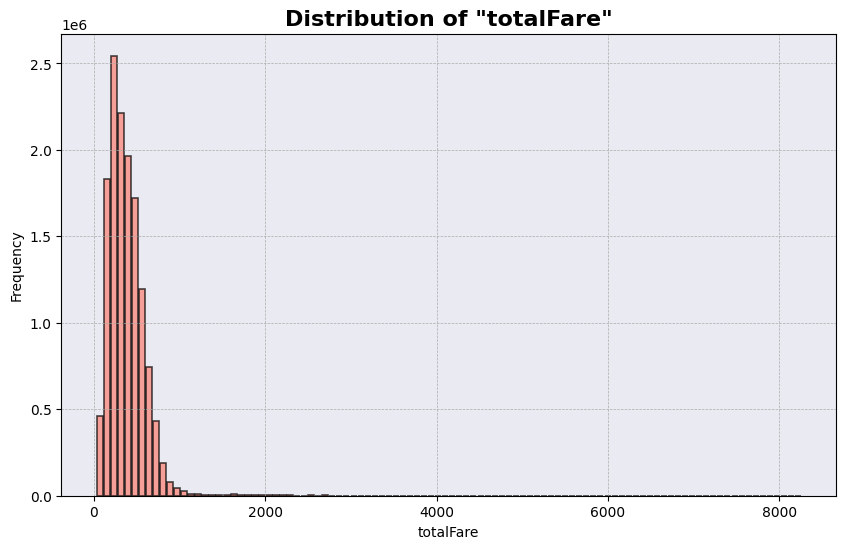

In [7]:
# Plotting the histogram
plt.figure(figsize=(10, 6))
plt.hist(df['totalFare'], bins=100, color='salmon', alpha=0.7, rwidth=0.85, edgecolor='black', linewidth=1.2, histtype='bar')
plt.title('Distribution of "totalFare"', fontsize=16, fontweight='bold')
plt.xlabel('totalFare')
plt.ylabel('Frequency')

# Setting the facecolor to grey
plt.gca().set_facecolor('#eaeaf2')

# Adding a darker grey, dashed grid
plt.grid(color='#ababab', linestyle='--', linewidth=0.5)

plt.show()


## Select the input from the user

df[["searchDate","flightDate",'startingAirport','destinationAirport',"segmentsCabinCode",'searchDayOfWeek',
       'searchMonth', 'searchYear','totalFare']]

In [8]:
df1 = df[["legId","searchDate","flightDate",'startingAirport','destinationAirport',"segmentsCabinCode",'totalFare',"segmentsDepartureTimeRaw"]]
df.head()

legId  searchDate  flightDate startingAirport  \
0  e1b137527b9175d7d930c3af82e70ae0  2022-04-19  2022-05-20             OAK   
1  d813ebd107e3fa700206c0d96015da7a  2022-04-19  2022-05-20             OAK   
2  e8ece5ad6f5962c696e06e031fc2a24a  2022-04-19  2022-05-20             OAK   
3  c004a54681335100f326c9613b3c9448  2022-04-19  2022-05-20             OAK   
4  4a42bbf77211b4afa7b9e14005949120  2022-04-19  2022-05-20             OAK   

  destinationAirport travelDuration  isBasicEconomy  isRefundable  isNonStop  \
0                ATL        PT7H52M           False         False      False   
1                ATL        PT6H15M           False         False      False   
2                ATL         PT9H6M           False         False      False   
3                ATL        PT6H17M           False         False      False   
4                ATL       PT14H12M           False         False      False   

   totalFare  ...  segmentsArrivalTimeEpochSeconds  \
0    103.980  ...           1653107460||1653126600   
1    216.580  ...           1653067080||1653084660   
2    216.580  ...           1653056820||1653084660   
3    237.580  ...           1653110940||1653127980   
4    307.210  ...           1653115560||1653159180   

                              segmentsArrivalTimeRaw  \
0  2022-05-20T22:31:00.000-06:00||2022-05-21T05:5...   
1  2022-05-20T10:18:00.000-07:00||2022-05-20T18:1...   
2  2022-05-20T07:27:00.000-07:00||2022-05-20T18:1...   
3  2022-05-20T22:29:00.000-07:00||2022-05-21T06:1...   
4  2022-05-20T23:46:00.000-07:00||2022-05-21T14:5...   

  segmentsArrivalAirportCode segmentsDepartureAirportCode  \
0                   DEN||ATL                     OAK||DEN   
1                   LAX||ATL                     OAK||LAX   
2                   LAX||ATL                     OAK||LAX   
3                   LAS||ATL                     OAK||LAS   
4                   SEA||ATL                     OAK||SEA   

                    segmentsAirlineName segmentsAirlineCode  \
0  Frontier Airlines||Frontier Airlines              F9||F9   
1      Spirit Airlines||Spirit Airlines              NK||NK   
2      Spirit Airlines||Spirit Airlines              NK||NK   
3      Spirit Airlines||Spirit Airlines              NK||NK   
4      Alaska Airlines||Alaska Airlines              AS||AS   

                        segmentsEquipmentDescription  \
0                                      ||Airbus A320   
1                  ||AIRBUS INDUSTRIE A320 SHARKLETS   
2  AIRBUS INDUSTRIE A320 SHARKLETS||AIRBUS INDUST...   
3       AIRBUS INDUSTRIE A320 SHARKLETS||Airbus A319   
4                     Boeing 737-900||Boeing 737-900   

  segmentsDurationInSeconds segmentsDistance segmentsCabinCode  
0               9180||10620        943||1207      coach||coach  
1               4920||15600       None||None      coach||coach  
2               4920||15600       None||None      coach||coach  
3               5580||13980       None||None      coach||coach  
4               7500||17580        672||2178      coach||coach  

[5 rows x 23 columns]

## Rename flightDate into DepartureDate

In [9]:
# Renaming the 'flightDate' column to 'DepartureDate'
df1.rename(columns={'flightDate': 'DepartureDate'}, inplace=True)

## Create DepartureTime

In [10]:
# Creating DepartureTime from first segmentsDepartureTimeRaw
df1['DepartureTime'] = df1['segmentsDepartureTimeRaw'].str.split('\|\|', expand=True)[0].str.strip().str.split('T', expand=True)[1].str[:5]

## Feature Engineering segmentsCabinCode

In [11]:
# Iterating through each row
cabin_counts = []
for value in df1.segmentsCabinCode:
    cabins = value.lower().split('||')  # Converting to lowercase and splitting the values by '||'

    # Counting the occurrences for each category in the current value
    category_count = {'coach': 0, 'business': 0, 'premium coach': 0, 'first': 0}
    for cabin in cabins:
        if cabin in category_count:
            category_count[cabin] += 1

    # Calculating the total count for the current row
    total_count = sum(category_count.values())

    # Calculating the percentage for each category in the current row
    percentage_count = {k: v / total_count for k, v in category_count.items()}

    # Appending the dictionary to the list
    cabin_counts.append(percentage_count)

# Creating a DataFrame from the list of dictionaries
cabin_counts_df1 = pd.DataFrame(cabin_counts)

# Print some rows of the calculated dataframe:
cabin_counts_df1[cabin_counts_df1["first"]!=0].head(5)

coach  business  premium coach  first
1109  0.000     0.000          0.000  1.000
1828  0.000     0.000          0.000  1.000
1829  0.000     0.000          0.000  1.000
1830  0.000     0.000          0.000  1.000
3305  0.333     0.000          0.000  0.667

In [12]:
# Adding columns from cabin_counts_df1 to df1
df1 = df1.reset_index()

# Add all 4 columns as relative frequencies from 0 to 1
df1['coach'] = cabin_counts_df1["coach"]
df1['business'] = cabin_counts_df1['business']
df1['premium coach'] = cabin_counts_df1['premium coach']
df1['first'] = cabin_counts_df1['first']


## Creating numSegments column

It counts how many stop until reaching destination

In [13]:
# Adding the number of segments
df1['numSegments'] = df1['segmentsCabinCode'].apply(lambda x: x.count('||') + 1)

In [14]:
# Drop old index
df1 = df1.drop("index",axis=1)

## Feature engineering searchDate and flightDate

In [15]:
# Extract day of the week, month, and year of searchDate
df1['searchDate'] = pd.to_datetime(df1['searchDate'])
df1['searchDayOfWeek'] = df1['searchDate'].dt.dayofweek
df1['searchMonth'] = df1['searchDate'].dt.month
df1['searchYear'] = df1['searchDate'].dt.year

In [16]:
# Extract day of the week, month, and year of flightDate
df1['DepartureDate'] = pd.to_datetime(df1['DepartureDate'])
df1['DepartureDateDayOfWeek'] = df1['DepartureDate'].dt.dayofweek
df1['DepartureDateMonth'] = df1['DepartureDate'].dt.month
df1['DepartureDateYear'] = df1['DepartureDate'].dt.year

## Feature engineering: New column "daysInAdvance"

In [17]:
# Creating new column daysInAdvance as the diff between searchDate and flightDate
df1['daysInAdvance'] = (df1['DepartureDate'] - df1['searchDate']).dt.days

## Cleaned df head

In [18]:
# Displaying head of cleaned dataset
df1.head()

legId searchDate DepartureDate startingAirport  \
0  e1b137527b9175d7d930c3af82e70ae0 2022-04-19    2022-05-20             OAK   
1  d813ebd107e3fa700206c0d96015da7a 2022-04-19    2022-05-20             OAK   
2  e8ece5ad6f5962c696e06e031fc2a24a 2022-04-19    2022-05-20             OAK   
3  c004a54681335100f326c9613b3c9448 2022-04-19    2022-05-20             OAK   
4  4a42bbf77211b4afa7b9e14005949120 2022-04-19    2022-05-20             OAK   

  destinationAirport segmentsCabinCode  totalFare  \
0                ATL      coach||coach    103.980   
1                ATL      coach||coach    216.580   
2                ATL      coach||coach    216.580   
3                ATL      coach||coach    237.580   
4                ATL      coach||coach    307.210   

                            segmentsDepartureTimeRaw DepartureTime  coach  \
0  2022-05-20T18:58:00.000-07:00||2022-05-21T00:5...         18:58  1.000   
1  2022-05-20T08:56:00.000-07:00||2022-05-20T10:5...         08:56  1.000   
2  2022-05-20T06:05:00.000-07:00||2022-05-20T10:5...         06:05  1.000   
3  2022-05-20T20:56:00.000-07:00||2022-05-20T23:2...         20:56  1.000   
4  2022-05-20T21:41:00.000-07:00||2022-05-21T07:0...         21:41  1.000   

   ...  premium coach  first  numSegments  searchDayOfWeek  searchMonth  \
0  ...          0.000  0.000            2                1            4   
1  ...          0.000  0.000            2                1            4   
2  ...          0.000  0.000            2                1            4   
3  ...          0.000  0.000            2                1            4   
4  ...          0.000  0.000            2                1            4   

   searchYear  DepartureDateDayOfWeek  DepartureDateMonth  DepartureDateYear  \
0        2022                       4                   5               2022   
1        2022                       4                   5               2022   
2        2022                       4                   5               2022   
3        2022                       4                   5               2022   
4        2022                       4                   5               2022   

   daysInAdvance  
0             31  
1             31  
2             31  
3             31  
4             31  

[5 rows x 21 columns]

In [19]:
# Drop create df_cleaned, with df, without segmentsCabinCode and segmentsDepartureTimeRaw
df_cleaned = df1.drop(['segmentsCabinCode', 'segmentsDepartureTimeRaw'], axis=1)

In [20]:
df_cleaned.head()

legId searchDate DepartureDate startingAirport  \
0  e1b137527b9175d7d930c3af82e70ae0 2022-04-19    2022-05-20             OAK   
1  d813ebd107e3fa700206c0d96015da7a 2022-04-19    2022-05-20             OAK   
2  e8ece5ad6f5962c696e06e031fc2a24a 2022-04-19    2022-05-20             OAK   
3  c004a54681335100f326c9613b3c9448 2022-04-19    2022-05-20             OAK   
4  4a42bbf77211b4afa7b9e14005949120 2022-04-19    2022-05-20             OAK   

  destinationAirport  totalFare DepartureTime  coach  business  premium coach  \
0                ATL    103.980         18:58  1.000     0.000          0.000   
1                ATL    216.580         08:56  1.000     0.000          0.000   
2                ATL    216.580         06:05  1.000     0.000          0.000   
3                ATL    237.580         20:56  1.000     0.000          0.000   
4                ATL    307.210         21:41  1.000     0.000          0.000   

   first  numSegments  searchDayOfWeek  searchMonth  searchYear  \
0  0.000            2                1            4        2022   
1  0.000            2                1            4        2022   
2  0.000            2                1            4        2022   
3  0.000            2                1            4        2022   
4  0.000            2                1            4        2022   

   DepartureDateDayOfWeek  DepartureDateMonth  DepartureDateYear  \
0                       4                   5               2022   
1                       4                   5               2022   
2                       4                   5               2022   
3                       4                   5               2022   
4                       4                   5               2022   

   daysInAdvance  
0             31  
1             31  
2             31  
3             31  
4             31

<br>
<br>
<br>
<br>
<br>
<br>
<br>
<br>

![image.png](https://i.ibb.co/wh2MfJR/5566691.png
) 

## Exploratory Data Analysis
<hr>

In [21]:
# For numerical columns, you can use describe() to get a summary that includes the range.
numerical_summary = df_cleaned.describe()
for col in numerical_summary.columns:
    print(f"Range for {col}: {numerical_summary[col]['min']} to {numerical_summary[col]['max']}")

# For non-numerical columns (e.g., dates and strings) assuming they are in a sortable format.
non_numerical_cols = df_cleaned.select_dtypes(include=['object', 'datetime']).columns

for col in non_numerical_cols:
    try:
        print(f"Range for {col}: {df_cleaned[col].min()} to {df_cleaned[col].max()}")
    except TypeError:  # In case of unsortable data types
        print(f"Cannot determine range for {col} due to unsortable data types.")


Range for totalFare: 23.97 to 8260.61
Range for coach: 0.0 to 1.0
Range for business: 0.0 to 1.0
Range for premium coach: 0.0 to 1.0
Range for first: 0.0 to 1.0
Range for numSegments: 1.0 to 4.0
Range for searchDayOfWeek: 0.0 to 6.0
Range for searchMonth: 4.0 to 5.0
Range for searchYear: 2022.0 to 2022.0
Range for DepartureDateDayOfWeek: 0.0 to 6.0
Range for DepartureDateMonth: 4.0 to 7.0
Range for DepartureDateYear: 2022.0 to 2022.0
Range for daysInAdvance: 1.0 to 60.0
Range for legId: 00000115f8d6a14453bcd1bbc90fbd0b to fffff05dd882ad461d73b6c5c6702089
Range for searchDate: 2022-04-16 00:00:00 to 2022-05-19 00:00:00
Range for DepartureDate: 2022-04-17 00:00:00 to 2022-07-17 00:00:00
Range for startingAirport: ATL to SFO
Range for destinationAirport: ATL to SFO
Range for DepartureTime: 00:01 to 23:59


<br>
<br>
<br>
<br>

## Bar Chart for Day of the Week vs. Average Fare
<hr>

In [22]:
df_cleaned.describe()

totalFare        coach     business  premium coach        first  \
count 13521345.000 13521345.000 13521345.000   13521345.000 13521345.000   
mean       373.751        0.997        0.000          0.002        0.001   
std        207.549        0.051        0.015          0.035        0.033   
min         23.970        0.000        0.000          0.000        0.000   
25%        223.470        1.000        0.000          0.000        0.000   
50%        344.600        1.000        0.000          0.000        0.000   
75%        487.600        1.000        0.000          0.000        0.000   
max       8260.610        1.000        1.000          1.000        1.000   

       numSegments  searchDayOfWeek  searchMonth   searchYear  \
count 13521345.000     13521345.000 13521345.000 13521345.000   
mean         1.784            3.003        4.511     2022.000   
std          0.573            1.968        0.500        0.000   
min          1.000            0.000        4.000     2022.000   
25%          1.000            1.000        4.000     2022.000   
50%          2.000            3.000        5.000     2022.000   
75%          2.000            5.000        5.000     2022.000   
max          4.000            6.000        5.000     2022.000   

       DepartureDateDayOfWeek  DepartureDateMonth  DepartureDateYear  \
count            13521345.000        13521345.000       13521345.000   
mean                    2.884               5.405           2022.000   
std                     1.970               0.685              0.000   
min                     0.000               4.000           2022.000   
25%                     1.000               5.000           2022.000   
50%                     3.000               5.000           2022.000   
75%                     5.000               6.000           2022.000   
max                     6.000               7.000           2022.000   

       daysInAdvance  
count   13521345.000  
mean          27.641  
std           17.343  
min            1.000  
25%           12.000  
50%           26.000  
75%           42.000  
max           60.000

<br>
<br>
<br>
<br>

## Distribution of Total Fare
<hr>

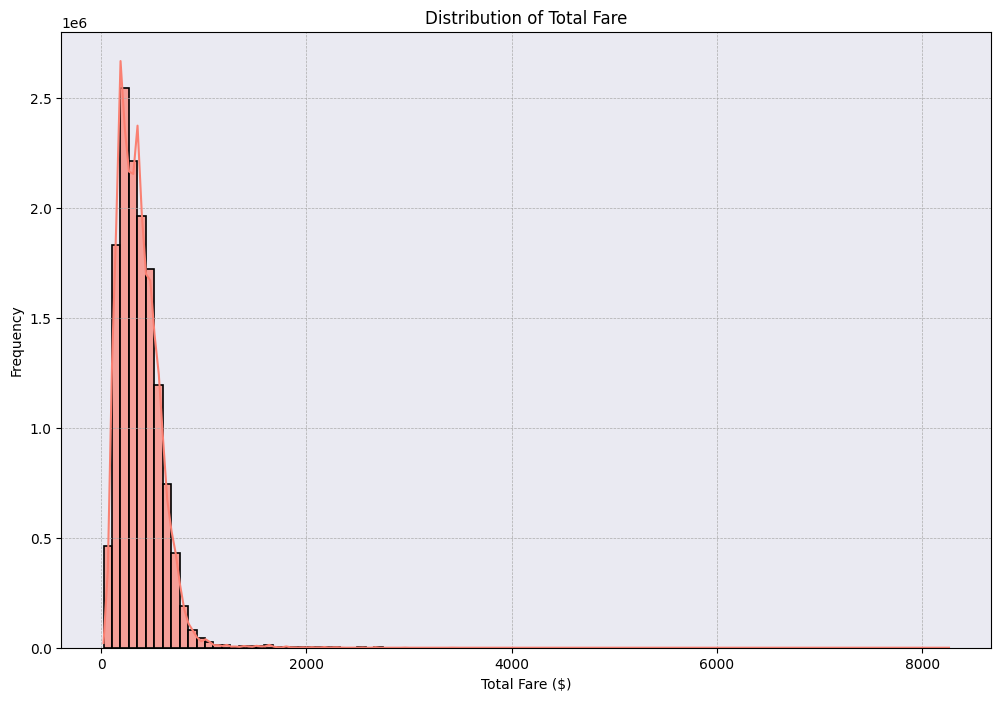

In [23]:
# Distribution of totalFare
plt.figure(figsize=(12, 8))
sns.histplot(df_cleaned['totalFare'], bins=100, kde=True, color='salmon', alpha=0.7, edgecolor='black', linewidth=1.2)
plt.title('Distribution of Total Fare')
plt.xlabel('Total Fare ($)')
plt.ylabel('Frequency')

# Setting the facecolor to grey
plt.gca().set_facecolor('#eaeaf2')

# Adding a darker grey, dashed grid
plt.grid(color='#ababab', linestyle='--', linewidth=0.5)

plt.show()


<br>
<br>
<br>
<br>

## Fare vs. Days in Advance Booking
<hr>

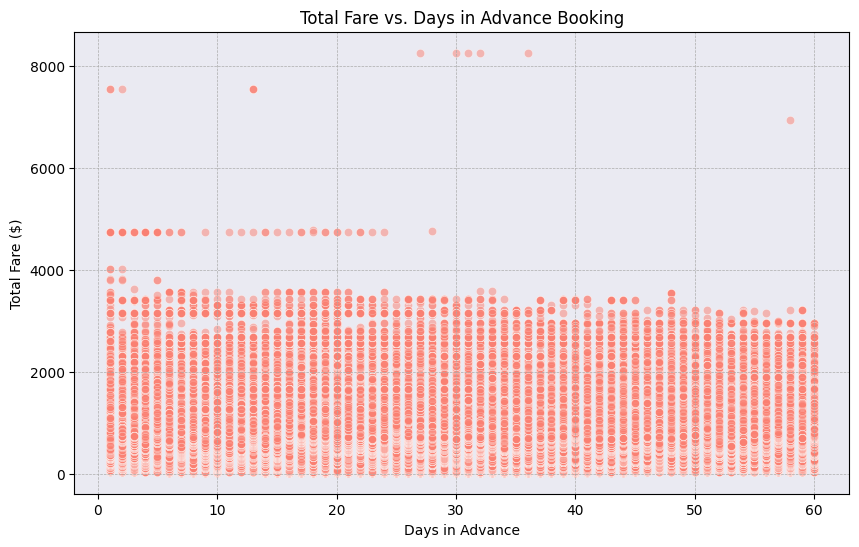

In [24]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='daysInAdvance', y='totalFare', data=df_cleaned, alpha=0.5, color='salmon')
plt.title('Total Fare vs. Days in Advance Booking')
plt.xlabel('Days in Advance')
plt.ylabel('Total Fare ($)')

# Setting the facecolor to grey
plt.gca().set_facecolor('#eaeaf2')

# Adding a darker grey, dashed grid
plt.grid(color='#ababab', linestyle='--', linewidth=0.5)


plt.show()


<br>
<br>
<br>
<br>

## Number of Segments Distribution
<hr>

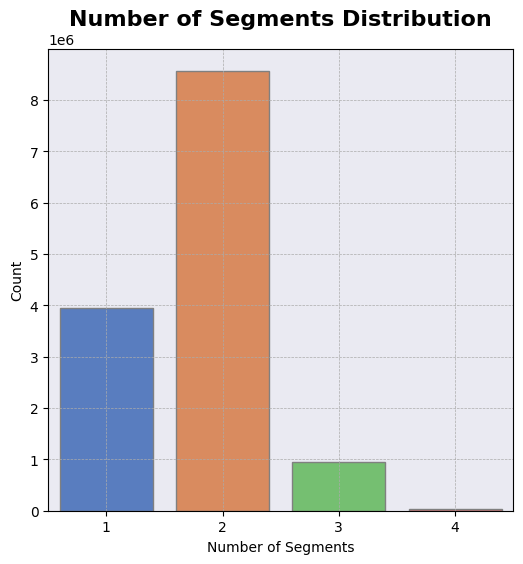

In [25]:
plt.figure(figsize=(6, 6))
sns.countplot(x='numSegments', data=df_cleaned, palette="muted", edgecolor='grey', linewidth=1)
plt.title('Number of Segments Distribution', fontsize=16, fontweight='bold')
plt.xlabel('Number of Segments')
plt.ylabel('Count')

# Setting the facecolor to grey
plt.gca().set_facecolor('#eaeaf2')

# Adding a darker grey, dashed grid
plt.grid(color='#ababab', linestyle='--', linewidth=0.5)

plt.show()


<br>
<br>
<br>
<br>

## Search Day of Week vs. Average Fare
<hr>

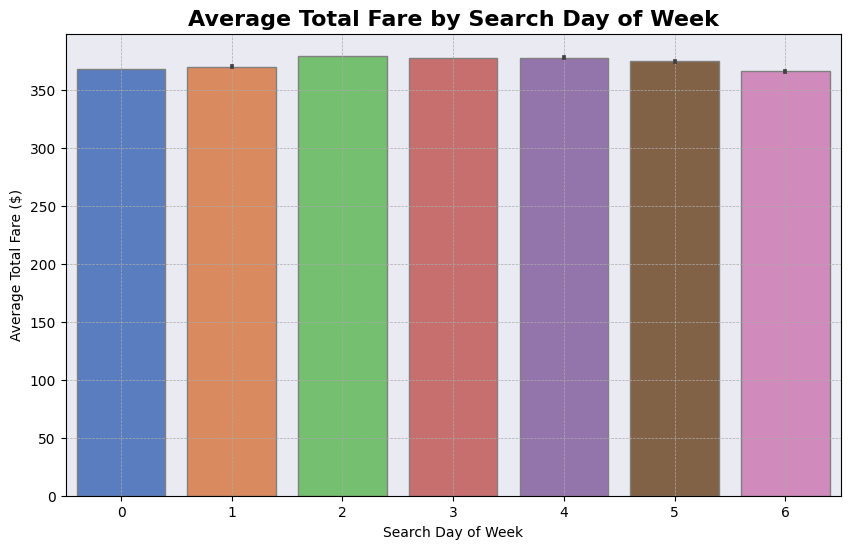

In [26]:
plt.figure(figsize=(10, 6))
sns.barplot(x='searchDayOfWeek', y='totalFare', data=df_cleaned, estimator=np.mean, palette="muted", edgecolor='grey', linewidth=1)
plt.title('Average Total Fare by Search Day of Week', fontsize=16, fontweight='bold')
plt.xlabel('Search Day of Week')
plt.ylabel('Average Total Fare ($)')

# Setting the facecolor to grey
plt.gca().set_facecolor('#eaeaf2')

# Adding a darker grey, dashed grid
plt.grid(color='#ababab', linestyle='--', linewidth=0.5)

plt.show()


<br>
<br>
<br>
<br>

## Departure Date Month and Average Fare
<hr>

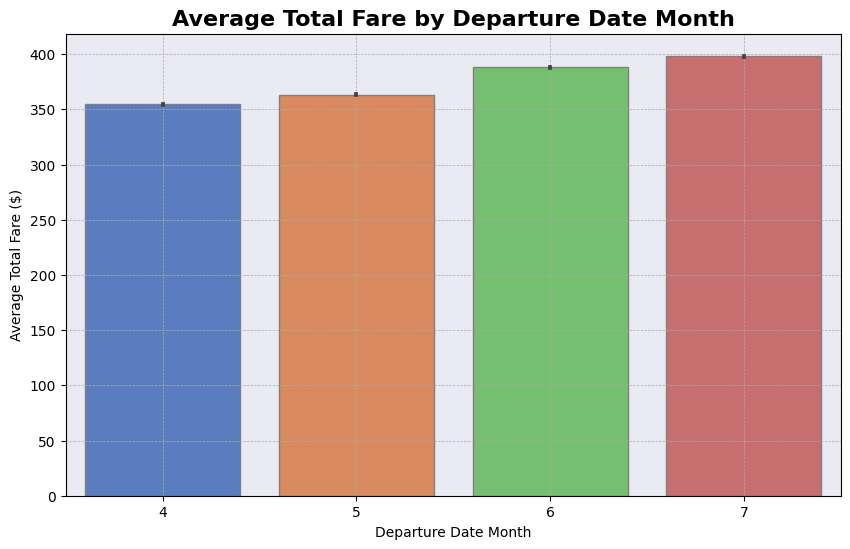

In [27]:
plt.figure(figsize=(10, 6))
sns.barplot(x='DepartureDateMonth', y='totalFare', data=df_cleaned, estimator=np.mean, palette="muted", edgecolor='grey', linewidth=1)
plt.title('Average Total Fare by Departure Date Month', fontsize=16, fontweight='bold')
plt.xlabel('Departure Date Month')
plt.ylabel('Average Total Fare ($)')

# Setting the facecolor to grey
plt.gca().set_facecolor('#eaeaf2')

# Adding a darker grey, dashed grid
plt.grid(color='#ababab', linestyle='--', linewidth=0.5)

plt.show()


<br>
<br>
<br>
<br>

## Bar Chart for Day of the Week vs. Average Fare
<hr>

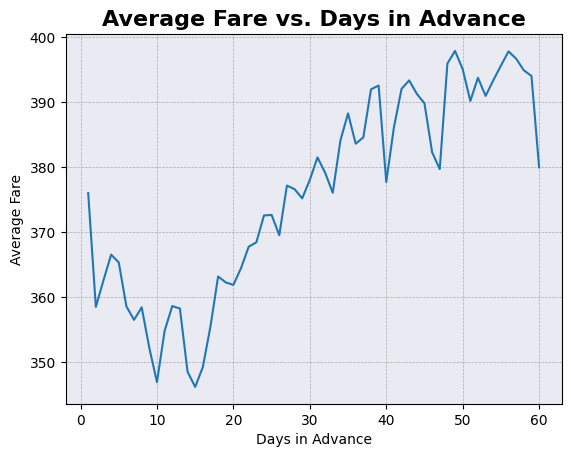

In [28]:
# Average fare by days in advance
avg_fare_advance = df_cleaned.groupby('daysInAdvance')['totalFare'].mean().reset_index()

sns.lineplot(x='daysInAdvance', y='totalFare', data=avg_fare_advance)
plt.title('Average Fare vs. Days in Advance', fontsize=16, fontweight='bold')
plt.xlabel('Days in Advance')
plt.ylabel('Average Fare')

# Setting the facecolor to grey
plt.gca().set_facecolor('#eaeaf2')

# Adding a darker grey, dashed grid
plt.grid(color='#ababab', linestyle='--', linewidth=0.5)

plt.show()



<br>
<br>
<br>
<br>

## Departure Date Month and Average Fare
<hr>

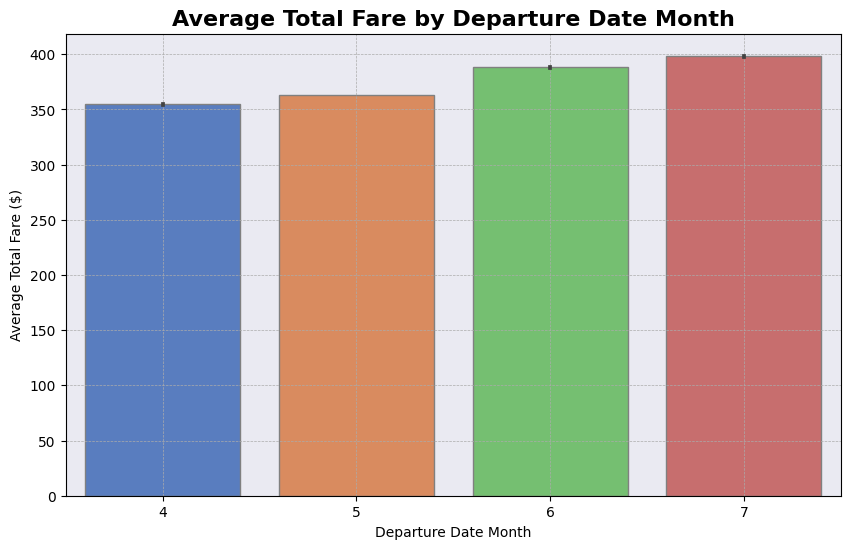

In [29]:
plt.figure(figsize=(10, 6))
sns.barplot(x='DepartureDateMonth', y='totalFare', data=df_cleaned, estimator=np.mean, palette="muted", edgecolor='grey', linewidth=1)
plt.title('Average Total Fare by Departure Date Month', fontsize=16, fontweight='bold')
plt.xlabel('Departure Date Month')
plt.ylabel('Average Total Fare ($)')

# Setting the facecolor to grey
plt.gca().set_facecolor('#eaeaf2')

# Adding a darker grey, dashed grid
plt.grid(color='#ababab', linestyle='--', linewidth=0.5)

plt.show()


<br>
<br>
<br>
<br>

## Heatmap of Correlation
<hr>

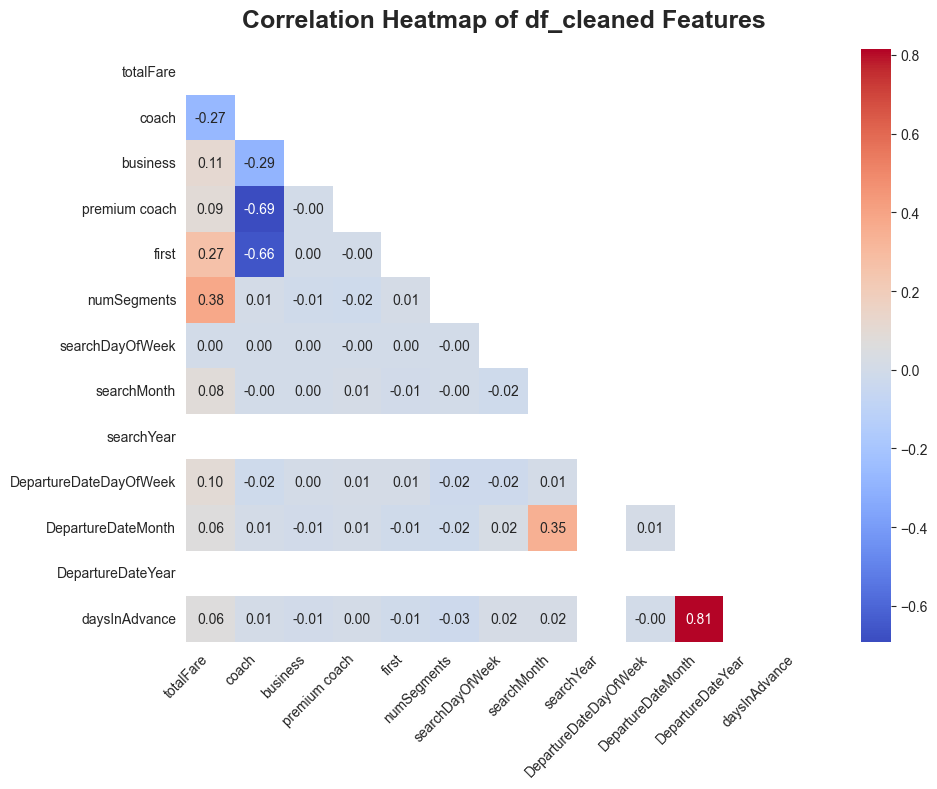

In [30]:
# Calculate correlation matrix
corr_matrix = df_cleaned.corr()

# Generate a mask for the upper triangle
mask = np.triu(np.ones_like(corr_matrix, dtype=bool))

# Create a heatmap
plt.figure(figsize=(10, 8))
sns.set_style('white')  
# Pass mask to the heatmap
heatmap = sns.heatmap(corr_matrix, mask=mask, annot=True, fmt='.2f', cmap='coolwarm', cbar=True)

# Enhance the heatmap for a more professional appearance
heatmap.set_title('Correlation Heatmap of df_cleaned Features', fontdict={'fontsize':18, 'fontweight':'bold'}, pad=16)
plt.xticks(fontsize=10, rotation=45, ha='right')
plt.yticks(fontsize=10, rotation=0)

# Adding a tight layout
plt.tight_layout()

plt.show()


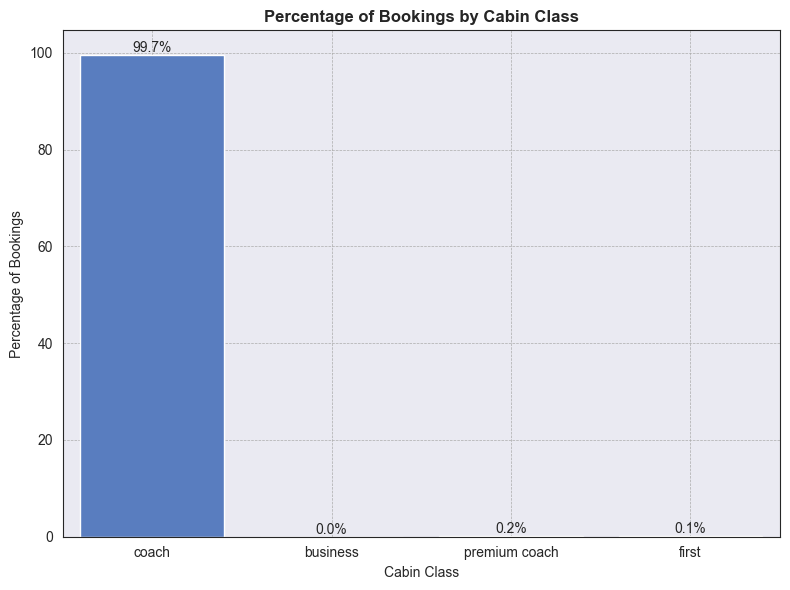

In [31]:
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming df_cleaned is your DataFrame with the cabin classes data available

# Data preparation
cabin_classes = ['coach', 'business', 'premium coach', 'first']
bookings = df_cleaned[cabin_classes].sum()

# Convert bookings to percentage
bookings_percentage = (bookings / bookings.sum()) * 100

# Set the color palette to pastel
colors = sns.color_palette("pastel")

# Bar chart
plt.figure(figsize=(8, 6))
sns.barplot(x=cabin_classes, y=bookings_percentage, palette="muted")

# Add the percentage values on top of the bars
for index, value in enumerate(bookings_percentage):
    plt.text(index, value, f'{value:.1f}%', ha='center', va='bottom')

# Title with bold font
plt.title('Percentage of Bookings by Cabin Class', fontweight='bold')
plt.xlabel('Cabin Class')
plt.ylabel('Percentage of Bookings')

# Set background color
plt.gca().set_facecolor('#eaeaf2')

# Adding a darker grey, dashed grid
plt.grid(color='#ababab', linestyle='--', linewidth=0.5)

# Tight layout to ensure everything fits without overlap
plt.tight_layout()

plt.show()


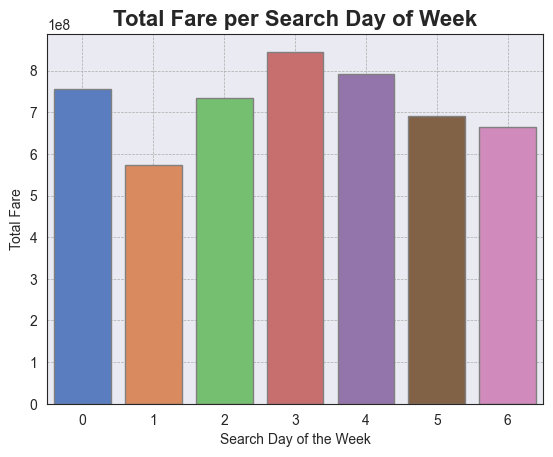

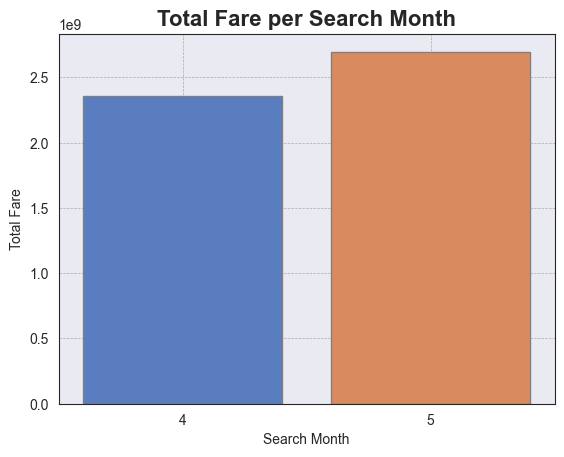

In [32]:
# Total fare per search day of the week
total_fare_dayofweek = df_cleaned.groupby('searchDayOfWeek')['totalFare'].sum().reset_index()

sns.barplot(x='searchDayOfWeek', y='totalFare', data=total_fare_dayofweek, palette="muted", edgecolor='grey', linewidth=1)
plt.title('Total Fare per Search Day of Week', fontsize=16, fontweight='bold')
plt.xlabel('Search Day of the Week')
plt.ylabel('Total Fare')

# Setting the facecolor to grey
plt.gca().set_facecolor('#eaeaf2')

# Adding a darker grey, dashed grid
plt.grid(color='#ababab', linestyle='--', linewidth=0.5)

plt.show()

# Total fare per search month
total_fare_month = df_cleaned.groupby('searchMonth')['totalFare'].sum().reset_index()

sns.barplot(x='searchMonth', y='totalFare', data=total_fare_month, palette="muted", edgecolor='grey', linewidth=1)
plt.title('Total Fare per Search Month', fontsize=16, fontweight='bold')
plt.xlabel('Search Month')
plt.ylabel('Total Fare')

# Setting the facecolor to grey
plt.gca().set_facecolor('#eaeaf2')

# Adding a darker grey, dashed grid
plt.grid(color='#ababab', linestyle='--', linewidth=0.5)

plt.show()


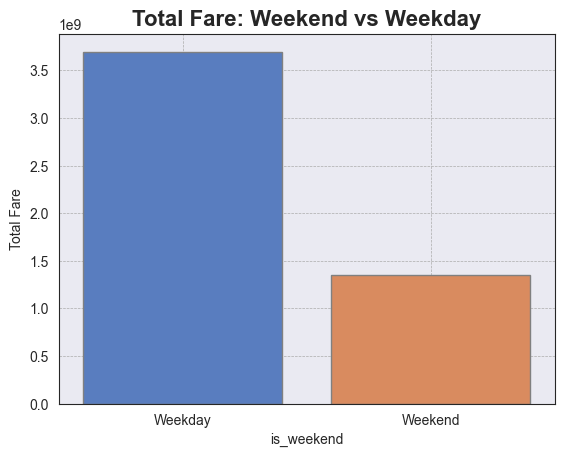

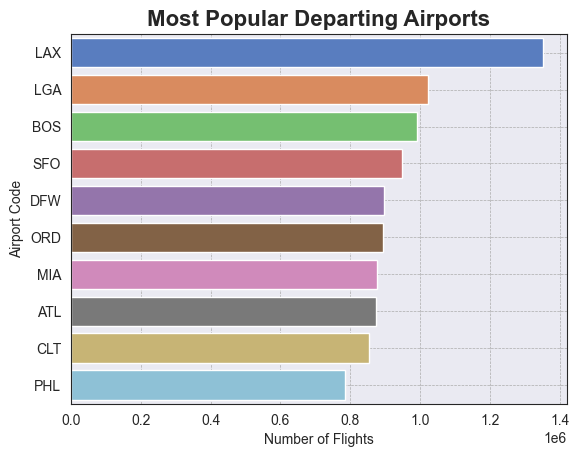

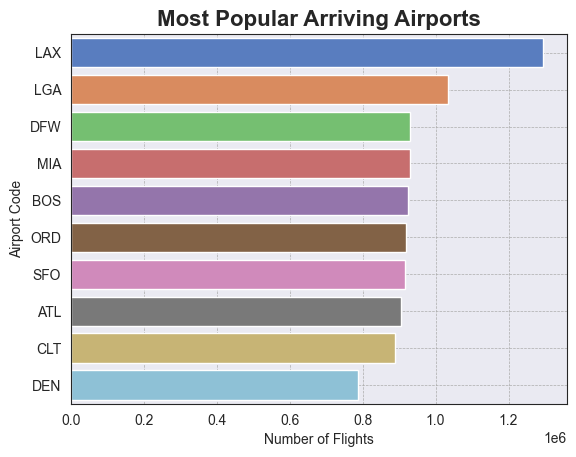

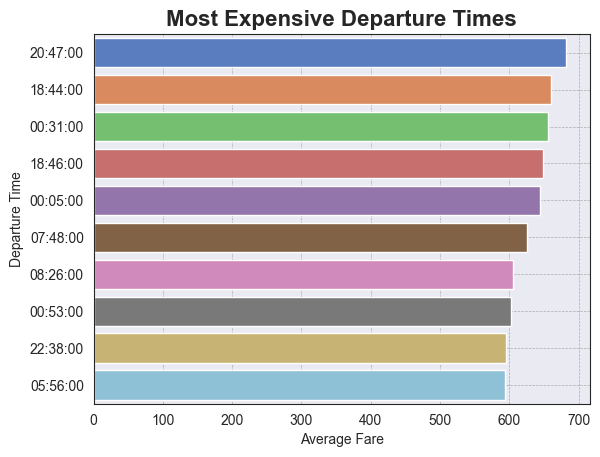

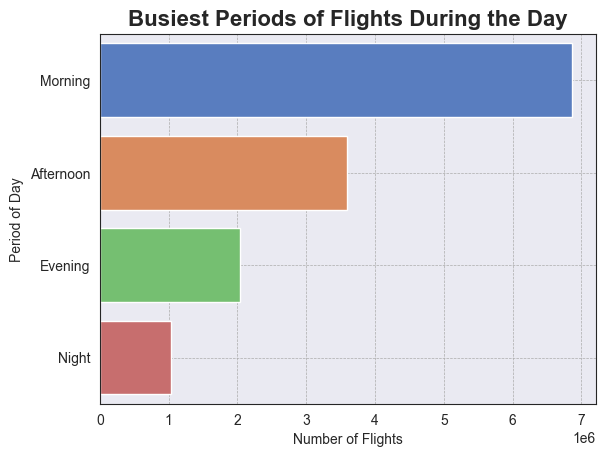

In [33]:
# Convert DepartureTime to datetime format for easier manipulation
df_cleaned['DepartureTime'] = pd.to_datetime(df_cleaned['DepartureTime'], format='%H:%M').dt.time

# Weekend vs Weekday total fare
df_cleaned['is_weekend'] = df_cleaned['searchDayOfWeek'].apply(lambda x: 1 if x in [5, 6] else 0)
weekend_weekday_fare = df_cleaned.groupby('is_weekend')['totalFare'].sum().reset_index()
weekend_weekday_fare['is_weekend'] = weekend_weekday_fare['is_weekend'].map({0: 'Weekday', 1: 'Weekend'})

sns.barplot(x='is_weekend', y='totalFare', data=weekend_weekday_fare, palette="muted", edgecolor='grey', linewidth=1)
plt.title('Total Fare: Weekend vs Weekday', fontsize=16, fontweight='bold')
plt.ylabel('Total Fare')

# Setting the facecolor to grey
plt.gca().set_facecolor('#eaeaf2')

# Adding a darker grey, dashed grid
plt.grid(color='#ababab', linestyle='--', linewidth=0.5)

plt.show()

# Most popular departing airport
departing_airport_counts = df_cleaned['startingAirport'].value_counts().head(10)
sns.barplot(y=departing_airport_counts.index, x=departing_airport_counts.values, palette="muted")
plt.title('Most Popular Departing Airports', fontsize=16, fontweight='bold')
plt.xlabel('Number of Flights')
plt.ylabel('Airport Code')

# Setting the facecolor to grey
plt.gca().set_facecolor('#eaeaf2')

# Adding a darker grey, dashed grid
plt.grid(color='#ababab', linestyle='--', linewidth=0.5)

plt.show()

# Most popular arriving airport
arriving_airport_counts = df_cleaned['destinationAirport'].value_counts().head(10)
sns.barplot(y=arriving_airport_counts.index, x=arriving_airport_counts.values, palette="muted")
plt.title('Most Popular Arriving Airports', fontsize=16, fontweight='bold')
plt.xlabel('Number of Flights')
plt.ylabel('Airport Code')

# Setting the facecolor to grey
plt.gca().set_facecolor('#eaeaf2')

# Adding a darker grey, dashed grid
plt.grid(color='#ababab', linestyle='--', linewidth=0.5)

plt.show()

# Most expensive departure time (showing top 10)
average_fare_by_time = df_cleaned.groupby('DepartureTime')['totalFare'].mean().reset_index()
top_expensive_times = average_fare_by_time.sort_values('totalFare', ascending=False).head(10)
sns.barplot(x='totalFare', y='DepartureTime', data=top_expensive_times, palette="muted")
plt.title('Most Expensive Departure Times', fontsize=16, fontweight='bold')
plt.xlabel('Average Fare')
plt.ylabel('Departure Time')

# Setting the facecolor to grey
plt.gca().set_facecolor('#eaeaf2')

# Adding a darker grey, dashed grid
plt.grid(color='#ababab', linestyle='--', linewidth=0.5)

plt.show()

# Busiest period of flights during the day (defining periods arbitrarily for illustration)
def get_period_of_day(time):
    if time < pd.Timestamp('12:00:00').time():
        return 'Morning'
    elif time < pd.Timestamp('17:00:00').time():
        return 'Afternoon'
    elif time < pd.Timestamp('21:00:00').time():
        return 'Evening'
    else:
        return 'Night'

df_cleaned['period_of_day'] = df_cleaned['DepartureTime'].apply(get_period_of_day)
period_counts = df_cleaned['period_of_day'].value_counts()

sns.barplot(y=period_counts.index, x=period_counts.values, palette="muted")
plt.title('Busiest Periods of Flights During the Day', fontsize=16, fontweight='bold')
plt.xlabel('Number of Flights')
plt.ylabel('Period of Day')

# Setting the facecolor to grey
plt.gca().set_facecolor('#eaeaf2')

# Adding a darker grey, dashed grid
plt.grid(color='#ababab', linestyle='--', linewidth=0.5)

plt.show()


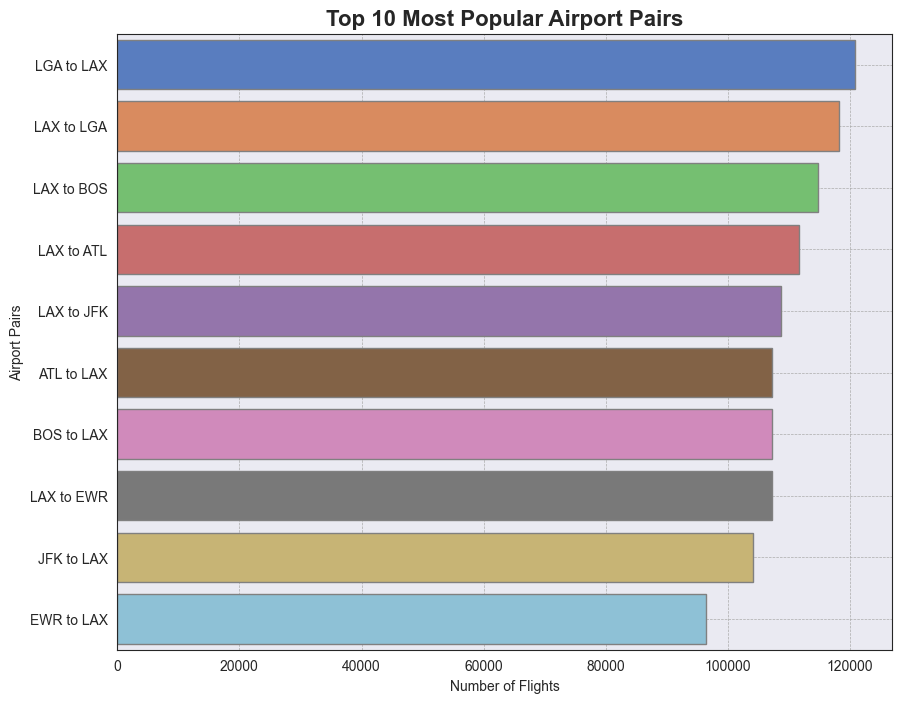

In [34]:
# Most popular pair of departing and arriving airports
df_cleaned['airport_pair'] = df_cleaned['startingAirport'] + ' to ' + df_cleaned['destinationAirport']
airport_pair_counts = df_cleaned['airport_pair'].value_counts().head(10)

plt.figure(figsize=(10, 8))
sns.barplot(y=airport_pair_counts.index, x=airport_pair_counts.values, palette="muted", edgecolor='grey', linewidth=1)
plt.title('Top 10 Most Popular Airport Pairs', fontsize=16, fontweight='bold')
plt.xlabel('Number of Flights')
plt.ylabel('Airport Pairs')

# Setting the facecolor to grey
plt.gca().set_facecolor('#eaeaf2')

# Adding a darker grey, dashed grid
plt.grid(color='#ababab', linestyle='--', linewidth=0.5)

plt.show()


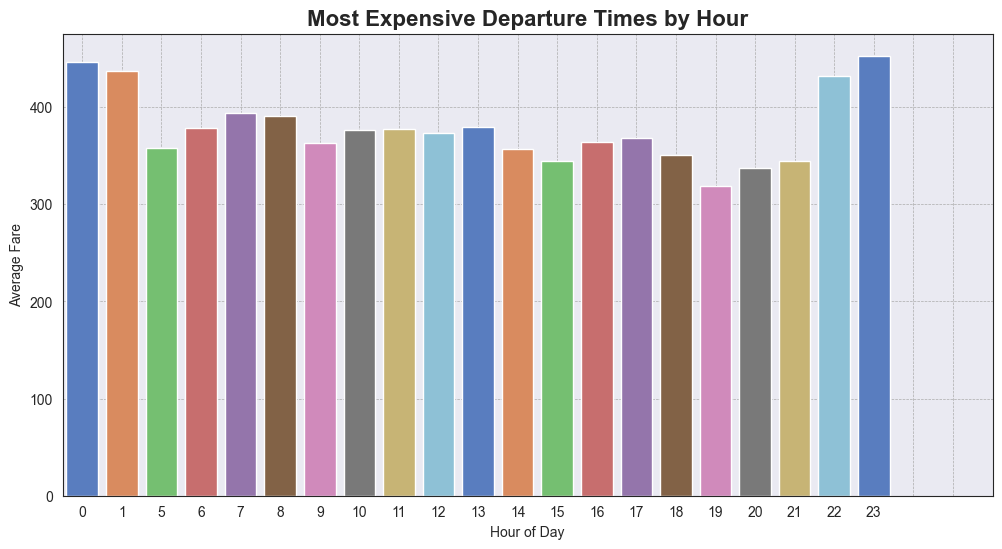

In [35]:
# Extract the hour from DepartureTime
df1['DepartureHour'] = pd.to_datetime(df1['DepartureTime'], format='%H:%M').dt.hour

# Group by the new DepartureHour to calculate the average fare
average_fare_by_hour = df1.groupby('DepartureHour')['totalFare'].mean().reset_index()

# Sort the results to find the most expensive average fares by hour
average_fare_by_hour = average_fare_by_hour.sort_values('totalFare', ascending=False)

# Plot the results
plt.figure(figsize=(12, 6))
sns.barplot(x='DepartureHour', y='totalFare', data=average_fare_by_hour, palette="muted")
plt.title('Most Expensive Departure Times by Hour', fontsize=16, fontweight='bold')
plt.xlabel('Hour of Day')
plt.ylabel('Average Fare')

# Setting the facecolor to grey
plt.gca().set_facecolor('#eaeaf2')

# Adding a darker grey, dashed grid
plt.grid(color='#ababab', linestyle='--', linewidth=0.5)

plt.xticks(range(0, 24))  # Ensure we have ticks for every hour
plt.show()


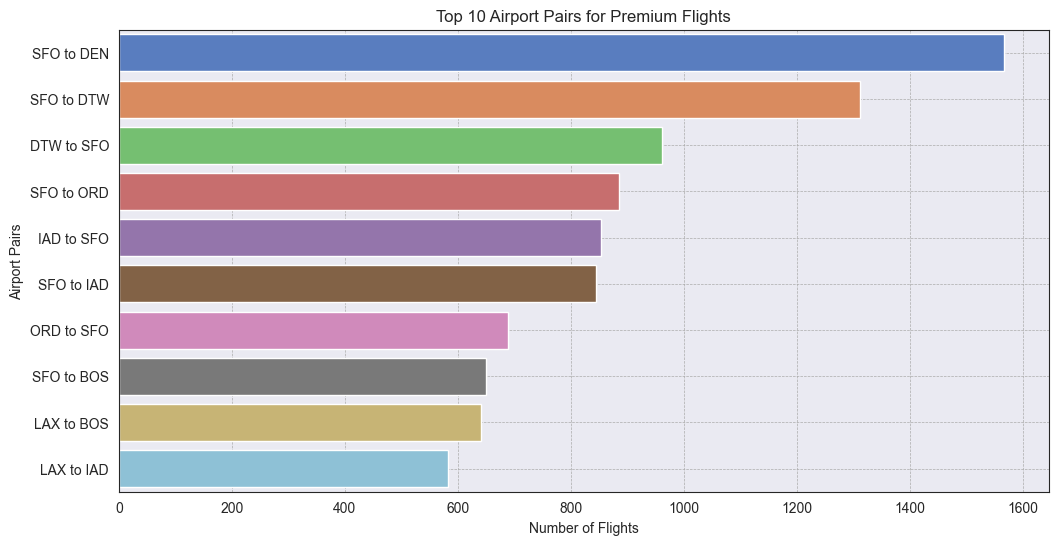

In [36]:
# Filter dataframe for rows where premium coach, business, or first is selected
premium_flights = df_cleaned[(df_cleaned['premium coach'] == 1) | (df_cleaned['business'] == 1) | (df_cleaned['first'] == 1)]

# Create a new 'airport_pair' column for premium flights
premium_flights['airport_pair'] = premium_flights['startingAirport'] + ' to ' + premium_flights['destinationAirport']

# Count the number of occurrences for each airport pair
premium_airport_pairs_counts = premium_flights['airport_pair'].value_counts().head(10)

# Visualize the top 10 airport pairs for premium flights
plt.figure(figsize=(12, 6))
sns.barplot(y=premium_airport_pairs_counts.index, x=premium_airport_pairs_counts.values, palette="muted")
plt.title('Top 10 Airport Pairs for Premium Flights')
plt.xlabel('Number of Flights')
plt.ylabel('Airport Pairs')

# Setting the facecolor to grey
plt.gca().set_facecolor('#eaeaf2')

# Adding a darker grey, dashed grid
plt.grid(color='#ababab', linestyle='--', linewidth=0.5)

plt.show()


In [37]:
# Step 1: Sum the percentages
df1['TotalPercentage'] = df1[['coach', 'premium coach', 'business', 'first']].mean(axis=1) * 100

# Step 2: Calculate the average totalFare per 'isRefundable' boolean
average_fare_by_refundable = df.groupby('isRefundable')['totalFare'].mean()

print("Average Total Fare by Refundable:")
print(average_fare_by_refundable)



Average Total Fare by Refundable:
isRefundable
False    373.735
True    1513.207
Name: totalFare, dtype: float64


In [38]:
# Sum the booking indicators and divide by the number of rows to get the overall percentages
total_bookings = df1[['coach', 'premium coach', 'business', 'first']].sum()
overall_percentage = (total_bookings / df1.shape[0]) * 100

print("Overall Percentage of Bookings by Cabin Class:")
print(overall_percentage)


Overall Percentage of Bookings by Cabin Class:
coach           99.674
premium coach    0.161
business         0.025
first            0.141
dtype: float64


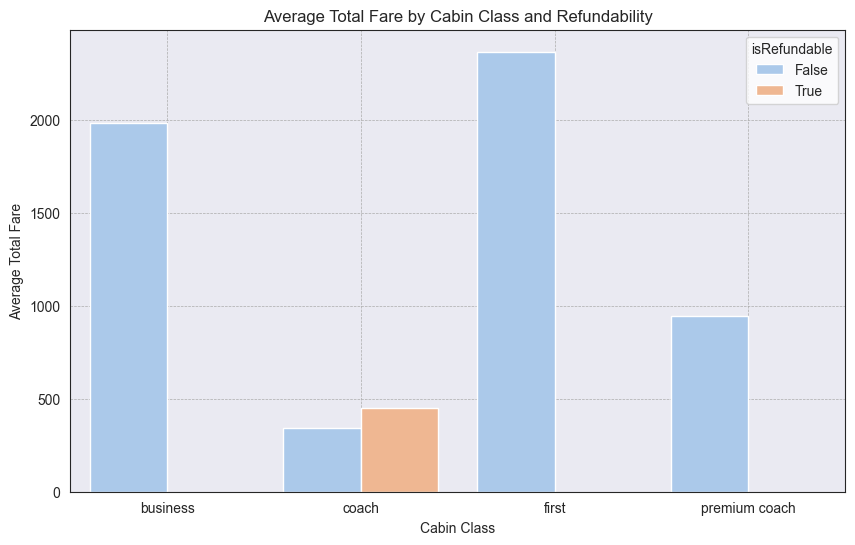

In [39]:
# Merge df and df1 on 'legId'
merged_df = pd.merge(df[['legId', 'isRefundable']], df1[['legId', 'coach', 'business', 'premium coach', 'first', 'totalFare']], on='legId')

# Melt the merged dataframe to get a long-form dataframe suitable for a seaborn barplot
melted_df = pd.melt(merged_df, id_vars=['isRefundable', 'totalFare'], value_vars=['coach', 'business', 'premium coach', 'first'], var_name='CabinClass', value_name='BookingIndicator')

# Filter out the rows where a cabin class wasn't booked (i.e., BookingIndicator is not 1.0)
melted_df = melted_df[melted_df['BookingIndicator'] == 1.0]

# Now calculate the average totalFare per cabin class and isRefundable
average_fare_by_cabin_refundable = melted_df.groupby(['CabinClass', 'isRefundable'])['totalFare'].mean().reset_index()

# Plotting the grouped bar chart
plt.figure(figsize=(10, 6))
sns.barplot(data=average_fare_by_cabin_refundable, x='CabinClass', y='totalFare', hue='isRefundable', palette='pastel')
plt.title('Average Total Fare by Cabin Class and Refundability')
plt.xlabel('Cabin Class')
plt.ylabel('Average Total Fare')

# Setting the facecolor to grey
plt.gca().set_facecolor('#eaeaf2')

# Adding a darker grey, dashed grid
plt.grid(color='#ababab', linestyle='--', linewidth=0.5)

# Show the plot
plt.show()


In [40]:
# Display a sample of 20 rows for "segmentsAirlineName" from df
df['segmentsAirlineName'].sample(20)

6195122                           United||United
10277191                           United||Delta
12412842                                  United
4502633                           United||United
5333937         Spirit Airlines||Spirit Airlines
8676204                           United||United
1525091                        American Airlines
3768410                          Alaska Airlines
8183297                                    Delta
5336824     American Airlines||American Airlines
2929847     American Airlines||American Airlines
7957265     American Airlines||American Airlines
47267                              Delta||United
2702488                             Delta||Delta
6929740     American Airlines||American Airlines
7428229                                   United
8006221                            Delta||United
12883298                         JetBlue Airways
13391767    American Airlines||American Airlines
10424911                                   Delta
Name: segmentsAirlin

In [41]:
# Correct the split operation to handle the '||' separator properly
airline_names_expanded = df['segmentsAirlineName'].str.split(r'\|\|', expand=True).stack().reset_index(level=1, drop=True)
airline_names_expanded.name = 'AirlineName'

# Join the expanded airline names with the original dataframe
df_expanded = df.join(airline_names_expanded)

# Now, let's merge this expanded dataframe with df1 to bring in the cabin class information
df_merged = pd.merge(
    df_expanded[['legId', 'AirlineName', 'totalFare']], 
    df1[['legId', 'coach', 'premium coach', 'business', 'first']], 
    on='legId'
)

# We need to melt the merged dataframe to convert it from wide format to long format
df_melted = pd.melt(
    df_merged, 
    id_vars=['AirlineName', 'totalFare'], 
    value_vars=['coach', 'premium coach', 'business', 'first'],
    var_name='CabinClass',
    value_name='BookingIndicator'
)

# Keep only the rows where the class was booked
df_melted = df_melted[df_melted['BookingIndicator'] > 0]

# Group by AirlineName and CabinClass and calculate the average fare
average_fare_per_class_airline = df_melted.groupby(['AirlineName', 'CabinClass'])['totalFare'].mean().reset_index()

# Plotting the grouped bar chart
plt.figure(figsize=(14, 10))
sns.barplot(
    data=average_fare_per_class_airline, 
    x='AirlineName', 
    y='totalFare', 
    hue='CabinClass', 
    palette='pastel'
)

# Enhance the plot
plt.title('Average Total Fare per Cabin Class for Each Airline')
plt.xlabel('Airline')
plt.ylabel('Average Total Fare')
plt.xticks(rotation=90)  # Rotate the x-axis labels for readability
plt.legend(title='Cabin Class')

# Set the facecolor and grid style
plt.gca().set_facecolor('#eaeaf2')
plt.grid(color='#ababab', linestyle='--', linewidth=0.5)

# Adjust layout
plt.tight_layout()

# Show the plot
plt.show()


: 

In [ ]:
# Ensure the DepartureDate is a datetime type
df['DepartureDate'] = pd.to_datetime(df['DepartureDate'])

# Create a new column that combines the year and month
df['YearMonth'] = df['DepartureDate'].dt.to_period('M')

# Group by this new column and sum the totalFare for each group
monthly_revenue = df.groupby('YearMonth')['totalFare'].sum().reset_index()

# Convert the YearMonth back to datetime for plotting
monthly_revenue['YearMonth'] = monthly_revenue['YearMonth'].dt.to_timestamp()

# Plotting the time series chart
plt.figure(figsize=(14, 7))
sns.lineplot(data=monthly_revenue, x='YearMonth', y='totalFare')
plt.title('Total Revenue Per Year-Month')
plt.xlabel('Date')
plt.ylabel('Total Revenue')

# Formatting the date axis
plt.gca().xaxis.set_major_locator(mdates.MonthLocator())
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%b %Y'))
plt.gcf().autofmt_xdate() # Rotate the dates for better readability

# Show the plot
plt.show()


NameError: name 'df' is not defined

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13521345 entries, 0 to 13521344
Data columns (total 23 columns):
 #   Column                             Dtype  
---  ------                             -----  
 0   legId                              object 
 1   searchDate                         object 
 2   flightDate                         object 
 3   startingAirport                    object 
 4   destinationAirport                 object 
 5   travelDuration                     object 
 6   isBasicEconomy                     bool   
 7   isRefundable                       bool   
 8   isNonStop                          bool   
 9   totalFare                          float64
 10  totalTravelDistance                float64
 11  segmentsDepartureTimeEpochSeconds  object 
 12  segmentsDepartureTimeRaw           object 
 13  segmentsArrivalTimeEpochSeconds    object 
 14  segmentsArrivalTimeRaw             object 
 15  segmentsArrivalAirportCode         object 
 16  segmentsDepartur

In [ ]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13521345 entries, 0 to 13521344
Data columns (total 22 columns):
 #   Column                    Dtype         
---  ------                    -----         
 0   legId                     object        
 1   searchDate                datetime64[ns]
 2   DepartureDate             datetime64[ns]
 3   startingAirport           object        
 4   destinationAirport        object        
 5   segmentsCabinCode         object        
 6   totalFare                 float64       
 7   segmentsDepartureTimeRaw  object        
 8   DepartureTime             object        
 9   coach                     float64       
 10  business                  float64       
 11  premium coach             float64       
 12  first                     float64       
 13  numSegments               int64         
 14  searchDayOfWeek           int64         
 15  searchMonth               int64         
 16  searchYear                int64         
 17  Depart

<br>
<br>
<br>
<br>
<br>
<br>
<br>
<br>
<br>
<br>
<br>
<br>

![image.png](https://i.ibb.co/wh2MfJR/5566691.png
) 

## Proof of Concept | Alternate approach to modelling

<hr>

#### Retrieving all features of the Dataframe (df_cleaned), with only:

- `"startingAirport"`  , 

- `"destinationAirport"`  , 

- `"departureDate"`  , 

- `"departureTime"`  , 

- `"cabinType"`

<br>
<br>
<br>
<br>

### `df_input` contains the following: 

#####                        *- `legId` , startingAirport , destinationAirport , departureDate , departureTime , SimplifiedCabin*

<br>
<br>
<br>

### `df` contains the following: 

#####                        *- `legId` , searchDate , flightDate , startingAirport , destinationAirport , travelDuration , isBasicEconomy ,*
#####                        *isRefundable , isNonStop , totalFare , totalTravelDistance , segmentsDepartureTimeEpochSeconds , segmentsDepartureTimeRaw ,*
#####                        *segmentsArrivalTimeEpochSeconds , segmentsArrivalTimeRaw , segmentsArrivalAirportCode , segmentsDepartureAirportCode ,*
#####                        *segmentsAirlineName , segmentsAirlineCode ,segmentsEquipmentDescription , segmentsDurationInSeconds , segmentsDistance , segmentsCabinCode*

<br>
<br>
<hr>
<br>
<br>
<br>
<br>
<br>
<br>
<br>


### By determining the legId, 
#### based on startingAirport , destinationAirport , departureDate , departureTime , SimplifiedCabin

#### All features within `df` may be retrieved with just the legId.

<br>
<br>
<br>
<br>
<br>
<br>
<br>
<br>
<br>

<br>
<br>




In [56]:
# List the features in the DataFrame
df.columns

Index(['legId', 'searchDate', 'DepartureDate', 'startingAirport',
       'destinationAirport', 'segmentsCabinCode', 'totalFare',
       'segmentsDepartureTimeRaw', 'DepartureTime', 'coach', 'business',
       'premium coach', 'first', 'numSegments', 'searchDayOfWeek',
       'searchMonth', 'searchYear', 'DepartureDateDayOfWeek',
       'DepartureDateMonth', 'DepartureDateYear', 'daysInAdvance',
       'DepartTime', 'DepartDate', 'SimplifiedCabin'],
      dtype='object')

In [57]:
# Function to extract the time
def extract_time(datetime_str):
    return datetime_str.split('T')[1].split('.')[0][:5]

# Function to extract the date
def extract_date(datetime_str):
    return datetime_str.split('T')[0]

# Extract the first datetime string before the '||' if it's present, otherwise take the whole string
df['first_datetime'] = df['segmentsDepartureTimeRaw'].apply(lambda x: x.split('||')[0])

# Apply the extract_time function to the new column to create the DepartTime feature
df['DepartTime'] = df['first_datetime'].apply(extract_time)

# Apply the extract_date function to the new column to create the DepartDate feature
df['DepartDate'] = df['first_datetime'].apply(extract_date)

# Now you can drop the temporary 'first_datetime' column if it's no longer needed
df.drop('first_datetime', axis=1, inplace=True)

# Now let's check the result
print(df[['segmentsDepartureTimeRaw', 'DepartTime', 'DepartDate']].sample(10))

                                   segmentsDepartureTimeRaw DepartTime  \
2463832   2022-04-27T22:37:00.000-07:00||2022-04-28T07:2...      22:37   
8870533   2022-05-12T14:58:00.000-05:00||2022-05-12T18:4...      14:58   
12406430  2022-04-30T17:55:00.000-05:00||2022-04-30T20:2...      17:55   
1276361   2022-06-17T06:48:00.000-06:00||2022-06-17T15:3...      06:48   
8911278                       2022-07-05T15:16:00.000-05:00      15:16   
7148088   2022-04-28T11:59:00.000-04:00||2022-04-28T15:3...      11:59   
3993011   2022-05-02T14:02:00.000-04:00||2022-05-02T18:5...      14:02   
3941805                       2022-05-11T21:13:00.000-04:00      21:13   
9182200   2022-05-20T17:38:00.000-04:00||2022-05-20T20:4...      17:38   
10981850  2022-06-22T06:00:00.000-07:00||2022-06-22T08:3...      06:00   

          DepartDate  
2463832   2022-04-27  
8870533   2022-05-12  
12406430  2022-04-30  
1276361   2022-06-17  
8911278   2022-07-05  
7148088   2022-04-28  
3993011   2022-05-02  
3

In [58]:
# Display segmentsCabinCode
df['segmentsCabinCode'].value_counts()

coach||coach                                   8528916
coach                                          3940628
coach||coach||coach                             950997
coach||coach||coach||coach                       37426
premium coach                                     9976
premium coach||coach                              9487
first||coach                                      9030
coach||premium coach                              8100
first||first                                      6286
coach||first                                      4718
first                                             3748
business                                          2092
premium coach||premium coach                      2015
first||first||first                               1248
premium coach||coach||coach                       1244
coach||coach||premium coach                        915
business||business                                 669
first||coach||coach                                427
coach||pre

In [59]:
# Check for the cabin codes in the order of priority and return the highest one present
def simplify_cabin_code(cabin_codes_str):
    if 'first' in cabin_codes_str:
        return 'first'
    elif 'business' in cabin_codes_str:
        return 'business'
    elif 'premium coach' in cabin_codes_str:
        return 'premium coach'
    else:
        return 'coach'

# Let's assume df is already defined and contains your data
# Now, apply the function to the 'segmentsCabinCode' column
df['SimplifiedCabin'] = df['segmentsCabinCode'].apply(simplify_cabin_code)

# Now let's check the result
print(df[['segmentsCabinCode', 'SimplifiedCabin']].sample(10))

         segmentsCabinCode SimplifiedCabin
3340995       coach||coach           coach
8089173       coach||coach           coach
11522999      coach||coach           coach
6558399       coach||coach           coach
2432456       coach||coach           coach
7012051       coach||coach           coach
12646182      coach||coach           coach
1003767              coach           coach
13016032      coach||coach           coach
6275593              coach           coach


In [ ]:
# # Add simplified cabin code to df_cleaned, call the new dataframe df_cleaned_sc
# df_cleaned_sc = df_cleaned.copy()
# df_cleaned_sc['SimplifiedCabin'] = df['SimplifiedCabin']

In [60]:
# Create a new dataframe with only the columns legId, startingAirport, destinationAirport, DepartTime, DepartDate, SimplifiedCabin
df_input = df[['legId', 'startingAirport', 'destinationAirport', 'DepartTime', 'DepartDate', 'SimplifiedCabin']].copy()

# Show the first 10 rows of the new dataframe
df_input.head(10)

legId startingAirport destinationAirport  \
0  e1b137527b9175d7d930c3af82e70ae0             OAK                ATL   
1  d813ebd107e3fa700206c0d96015da7a             OAK                ATL   
2  e8ece5ad6f5962c696e06e031fc2a24a             OAK                ATL   
3  c004a54681335100f326c9613b3c9448             OAK                ATL   
4  4a42bbf77211b4afa7b9e14005949120             OAK                ATL   
5  9157572cdd530976f707a162a4fcfde8             OAK                ATL   
6  1818c5a6f7059cfde40105cdacda9c29             OAK                ATL   
7  e8baed3d41a0c35856f7591a5baad060             OAK                ATL   
8  965e29ef7e8d11bf05f723a28ab8e4e0             OAK                ATL   
9  50aae8333ddca38814b9756bba08daad             OAK                ATL   

  DepartTime  DepartDate SimplifiedCabin  
0      18:58  2022-05-20           coach  
1      08:56  2022-05-20           coach  
2      06:05  2022-05-20           coach  
3      20:56  2022-05-20           coach  
4      21:41  2022-05-20           coach  
5      06:30  2022-05-20           coach  
6      13:00  2022-05-20           coach  
7      16:04  2022-05-20           coach  
8      17:18  2022-05-20           coach  
9      17:18  2022-05-20           coach

In [62]:
# Sample function to parse time and date for the simplicity of matching
def parse_time_and_date(time_str, date_str):
    return time_str, date_str

def find_closest_leg(input_data, df_input):
    
    # Extract input details
    starting_airport, destination_airport, depart_time, depart_date, cabin = input_data
    
    # Parse the DepartTime and DepartDate for comparison
    depart_time, depart_date = parse_time_and_date(depart_time, depart_date)
    
    # Find the closest match in df_input
    # This is a simple filter-based approach; you may need a more complex time-matching logic
    closest_matches = df_input[
        (df_input['startingAirport'] == starting_airport) &
        (df_input['destinationAirport'] == destination_airport) &
        (df_input['DepartDate'] == depart_date) &
        (df_input['SimplifiedCabin'] == cabin)
    ]
    
    # Find the closest time match
    closest_matches['TimeDifference'] = closest_matches['DepartTime'].apply(
        lambda x: abs(pd.to_datetime(depart_time) - pd.to_datetime(x))
    )
    closest_match = closest_matches.loc[closest_matches['TimeDifference'].idxmin()]
    
    # Return the legId of the closest match
    return closest_match['legId']

In [63]:
# This is an example of how you would call the function with user input
user_input = ('OAK', 'ATL', '18:58', '2022-05-20', 'coach')
closest_leg_id = find_closest_leg(user_input, df_input)

# Now, use the closest_leg_id to find the corresponding totalFare in df
total_fare = df[df['legId'] == closest_leg_id]['totalFare'].iloc[0]
print(f'The total fare for legId {closest_leg_id} is {total_fare}')


The total fare for legId e1b137527b9175d7d930c3af82e70ae0 is 103.98


In [64]:
# Show the first 10 rows of the new dataframe
df_input.sample(30)

legId startingAirport destinationAirport  \
1321465   be6845a903b56d8d696dbc1e6f029fbe             LGA                DEN   
5450071   21aa8118a9945d174d21d41a5f01c190             PHL                ATL   
6083221   46d9cc12b7de475926d3f401c07e6b3d             PHL                SFO   
2826891   4ccc757c344ffb3cfebb66a08050eca1             LAX                EWR   
8050496   ac3260b81f8e249b693f5812b48bde0e             JFK                ATL   
2684931   d74321af9d8d6fe0d1d0d26bcca51e80             LAX                LGA   
4549661   463e0a07af43f8b7dd433bd1b42f3be6             CLT                PHL   
6621987   67ed75a267ce4c5514c19e217fb68edf             DTW                ATL   
12806210  c0a4c1a474fdcee0440124f230232e07             MIA                DFW   
12255579  a2bc9dc0836a734ecdc51f097a871318             ORD                MIA   
3158628   3ffb05aa760775ec6c78f93aa47c16cf             LAX                MIA   
9250532   64f480f04a8413862b2e05907fea8219             BOS                JFK   
4056235   95514a938299ec48ec12a688fb23f665             ATL                DTW   
8862277   69f9861d6bbbd7c97811f061545fddc2             DFW                LGA   
570107    88bc23eea2cb3322cac172dfe7325e29             DEN                BOS   
7805841   9cec7efe4bbf0c00d5fecd19c8737ef9             JFK                IAD   
8943472   96124a9331824a9030f893f7712261fe             DFW                MIA   
7886136   383aecb9288de87c4131ec2ac3b7e784             JFK                CLT   
1684281   ce95c24ab7003edd30a3670a061bbb73             LGA                ORD   
8121139   3812c483bb25282bc3498f332212006a             JFK                LAX   
8564642   c8a356b140705a3e46452416939c7ddf             DFW                EWR   
12237302  5b53147a8e41e7075c7e87fdd291a020             ORD                DEN   
1198845   9dc1a3f0f8a950198d22cfe8b8ef6481             DEN                LGA   
9284948   51e01aa1094c978e8bd0d97722d933d1             BOS                MIA   
2528817   06047c7cbf2346d4554d5a70aa904a65             LAX                IAD   
5318741   4e2b745cb0f6f695f14e898acf0fd98d             CLT                MIA   
5129524   ad2cbb05cc765a0718a25dcf990b8d4e             CLT                ATL   
13239602  4ba19345e062f98ba1ace3e8776c5975             MIA                CLT   
11021381  8986e5458bdf43185bafacfa587a6b6b             SFO                PHL   
5679414   b0002ca6566135282ac3723faa917f78             PHL                DFW   

         DepartTime  DepartDate SimplifiedCabin  
1321465       09:26  2022-04-23           coach  
5450071       18:49  2022-06-10           coach  
6083221       12:27  2022-04-27           coach  
2826891       05:30  2022-06-21           coach  
8050496       14:59  2022-06-19           coach  
2684931       07:00  2022-05-24           coach  
4549661       22:04  2022-07-06           coach  
6621987       14:30  2022-05-10           coach  
12806210      06:30  2022-05-27           coach  
12255579      12:10  2022-04-21           coach  
3158628       22:21  2022-05-10           coach  
9250532       18:35  2022-05-27           coach  
4056235       17:59  2022-06-17           coach  
8862277       06:20  2022-05-04           coach  
570107        06:00  2022-05-14           coach  
7805841       09:15  2022-06-20           coach  
8943472       18:55  2022-05-10           coach  
7886136       07:29  2022-06-15           coach  
1684281       11:05  2022-06-13           coach  
8121139       18:30  2022-06-02           coach  
8564642       20:35  2022-05-21           coach  
12237302      17:35  2022-05-30           coach  
1198845       17:35  2022-06-04           coach  
9284948       16:20  2022-05-12           coach  
2528817       16:40  2022-06-18           coach  
5318741       07:21  2022-05-27           coach  
5129524       18:04  2022-05-21           coach  
13239602      11:20  2022-06-02           coach  
11021381      06:34  2022-05-24           coach  
5679414       08:10  2022

In [65]:
# Function to simulate user input and find totalFare
def simulate_user_input_and_find_fare(df_input, df, n=20):
    # Randomly select n rows from df_input
    sampled_input = df_input.sample(n)
    
    # List to store the results
    results = []
    
    # Loop through the sampled rows
    for index, row in sampled_input.iterrows():
        # User input variables
        starting_airport = row['startingAirport']
        destination_airport = row['destinationAirport']
        depart_date = row['DepartDate']
        simplified_cabin = row['SimplifiedCabin']
        
        # Find matching legId in df based on the criteria
        matched_row = df.loc[
            (df['startingAirport'] == starting_airport) & 
            (df['destinationAirport'] == destination_airport) & 
            (df['DepartureDate'] == depart_date) & 
            (df['segmentsCabinCode'].str.contains(simplified_cabin))
        ]
        
        # Check if we have an exact match based on legId
        exact_match = not matched_row.empty and row['legId'] in matched_row['legId'].values
        
        # If there's a match, retrieve the totalFare
        total_fare = matched_row['totalFare'].iloc[0] if not matched_row.empty else None
        
        # Append the result
        results.append({
            'user_input': row.to_dict(),
            'matched_legId': matched_row['legId'].iloc[0] if not matched_row.empty else None,
            'totalFare': total_fare,
            'is_correct_row': exact_match
        })
        
    return pd.DataFrame(results)

# Now let's simulate the user input and find the fares
resulting_fares = simulate_user_input_and_find_fare(df_input, df)

# Print the resulting fares and correctness
for index, result in resulting_fares.iterrows():
    print(f"User Input: {result['user_input']}")
    print(f"Total Fare: {result['totalFare']}")
    print(f"Correct Row: {'Yes' if result['is_correct_row'] else 'No'}\n")


User Input: {'legId': 'ec5b1709acc92e238ebe2d27717b6880', 'startingAirport': 'IAD', 'destinationAirport': 'DEN', 'DepartTime': '13:30', 'DepartDate': '2022-05-10', 'SimplifiedCabin': 'coach'}
Total Fare: 102.6
Correct Row: Yes

User Input: {'legId': '8e61c17163ff9b47779550ba5fcac10c', 'startingAirport': 'DTW', 'destinationAirport': 'LAX', 'DepartTime': '05:35', 'DepartDate': '2022-06-05', 'SimplifiedCabin': 'coach'}
Total Fare: 178.59
Correct Row: Yes

User Input: {'legId': '69c1763876ff7df93f34365176a5e2b2', 'startingAirport': 'EWR', 'destinationAirport': 'DFW', 'DepartTime': '10:59', 'DepartDate': '2022-05-06', 'SimplifiedCabin': 'coach'}
Total Fare: 159.6
Correct Row: Yes

User Input: {'legId': 'd224126989f9f1d2ab427525af87b087', 'startingAirport': 'OAK', 'destinationAirport': 'BOS', 'DepartTime': '07:16', 'DepartDate': '2022-05-09', 'SimplifiedCabin': 'coach'}
Total Fare: 244.68
Correct Row: Yes

User Input: {'legId': '20dcd82834edcaffadae516d60e70009', 'startingAirport': 'OAK', 'd

<br>
<br>
<br>
<br>

## Checking Viability of Approach
#### Determining if there are legId's that share 
<hr>

In [1]:

# Step 1: Create a boolean series where True denotes a duplicated row based on specified columns
duplicates = df.duplicated(subset=['legId', 'startingAirport', 'destinationAirport', 'DepartureTime', 'DepartureDate', 'SimplifiedCabin'], keep=False)

# Step 2: Filter the dataframe to include only duplicated rows
duplicated_df = df[duplicates]

# Step 3: Group by the specified columns to find counts and print the 'legId' for each set of duplicates
grouped_duplicates = duplicated_df.groupby(['legId', 'startingAirport', 'destinationAirport', 'DepartureTime', 'DepartureDate', 'SimplifiedCabin'])

# Iterate over each group of duplicates
for name, group in grouped_duplicates:
    if counter < 50:
        print(f"Duplicated set: {name}")
        print(f"Count: {group.shape[0]}")
        print(f"LegIds: {group['legId'].unique().tolist()}\n")
        counter += 1
    else:
        break


NameError: name 'df' is not defined

<br>
<br>
<br>
<br>
<br>
<br>



## Method is not viable, as there are mutliple legId's that share the same features.

<hr>


<br>
<br>
<br>
